In [1]:

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


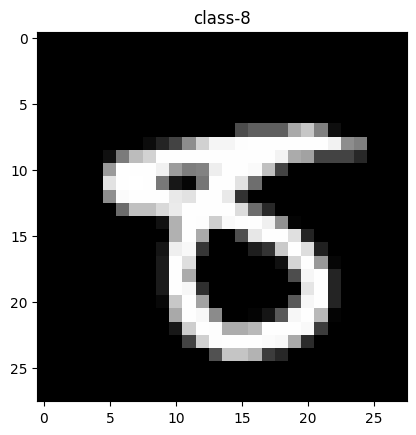

Train image 39832-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76  95  95
   95 169 198 128  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = './data/images/mnist/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:

x_train_flat=train_images.flatten().reshape(60000,28*28).astype(np.float64)
x_test_flat=test_images.flatten().reshape(10000,28*28).astype(np.float64)

val_ratio = 0.2
val_samples=int(val_ratio * len(x_train_flat))  #12000

x_val = x_train_flat[:val_samples]
y_val = train_labels[:val_samples]

x_train_new=x_train_flat[val_samples:]
y_train_new=train_labels[val_samples:]


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [4]:
def distance_1(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sum(np.abs(X_train - test_point), axis=1)
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx

def knn_model(x_train_new, y_train_new, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train_new[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    
    return pred   

acc1={}

dist_1= distance_1(x_train_new, x_val)

for k in range(1,26,2):
    p_1=knn_model(x_train_new,y_train_new,x_val,k,dist_1)
    accuracy=np.mean(p_1==y_val)
    acc1[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

In [ ]:
def distance_2(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx


def knn_model(x_train_new, y_train_new, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train_new[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    
    return pred  

acc2={}

dist_2= distance_2(x_train_new, x_val)

for k in range(1,26,2):
    p_2=knn_model(x_train_new,y_train_new,x_val,k,dist_2)
    accuracy=np.mean(p_2==y_val)
    acc2[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

In [ ]:
def distance_inf(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.max(np.abs(X_train - test_point), axis=1)
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx

def knn_model(x_train_new, y_train_new, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train_new[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    
    return pred  

acc3={}

dist_inf= distance_inf(x_train_new, x_val)

for k in range(1,26,2):
    p_3=knn_model(x_train_new,y_train_new,x_val,k,dist_inf)
    accuracy=np.mean(p_3==y_val)
    acc3[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

 <h1> 3-D Plotting </h1>

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection = "3d")
x = np.array([[1]*13 , ([2]*13) , ([3]*13)]) 
b = [int(k) for k in range (1,26,2)]
y = np.array([b,b,b])
z = np.array([list(acc1.values()),list(acc2.values()),list(acc3.values())])
ax.plot_surface(x,y,z,cmap = 'coolwarm',edgecolor = 'pink')
ax.set_title('3D surface plot for Accuracy(Z-Axis) , K-value(Y Axis) & p value(X Axis)')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1', '2', 'inf'])
plt.show()

<h1> Extracting Dictionary "values" and creating list to construct Data frame

In [ ]:
z = np.array([list(acc1.values()),list(acc2.values()),list(acc3.values())])
z_transpose=z.T

<h1> Created Data Frame </h1>

In [ ]:
import pandas as pd 

col=["P=1","P=2","P=inf"]

df=pd.DataFrame(z_transpose,index=b,columns=col)
df

<h1> Maximum accuracy Value and corresponding P ,  K value finding </h1>

In [ ]:
max_value = df.max().max()
max_value_index = df.stack().idxmax()

print ("Max accuracy got for K value " , max_value_index[0],"and ", max_value_index[1] , " ,max value is =" ,max_value)

<h1> Predicting for test_data </h1>

In [ ]:
test_dist= distance_2(x_train_flat, x_test_flat)

test_predict=knn_model(x_train_flat,train_labels,x_test_flat,max_value_index[0],test_dist)
accuracy_test=np.mean(test_predict==test_labels)


<h1> Accuracy for Test_data </h1>

In [ ]:
print("Accuracy fo test data is : " , accuracy_test*100 , "%")